<a href="https://colab.research.google.com/github/AlexPam/A/blob/master/USDC_Depeg_Event.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Run the pip install command below if you don't already have the library
!pip install git+https://github.com/JustAnotherArchivist/snscrape.git



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/JustAnotherArchivist/snscrape.git to /tmp/pip-req-build-1o22vcqz
  Running command git clone --filter=blob:none --quiet https://github.com/JustAnotherArchivist/snscrape.git /tmp/pip-req-build-1o22vcqz
  Resolved https://github.com/JustAnotherArchivist/snscrape.git to commit 3dd9c28e31b8babeb2a187fbae994d9717ded168
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for snscrape: filename=snscrape-0.6.2.20230321.dev3+g3dd9c28-py3-none-any.whl size=72466 sha256=41ba7b0237e92a3211c84635fc95d08e10a0f7d021b88f209d0b3e905ad45bee
  Stored in directory: /tmp/pip-ephem-wheel-cache-44ggr4vm/wheels/1a/ba/e2/39fa3a11802c4a622f2efc8be3f5ff854481051d0b4c95c1fd
Successfully built snscrape


In [2]:
 pip install emot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.5/61.5 kB 8.1 MB/s eta 0:00:00


In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import emot
import nltk
%matplotlib inline

import nltk
nltk.download('stopwords') #run once and comment it out to avoid it downloading multiple times
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from emot.emo_unicode import UNICODE_EMOJI

import string
import re
import textblob
from textblob import TextBlob

from wordcloud import WordCloud, STOPWORDS

porter = PorterStemmer()

lemmatizer = WordNetLemmatizer() 

from wordcloud import ImageColorGenerator
from PIL import Image

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [4]:
# Setting variables to be used in format string command below
tweet_count = 15000
text_query = "usdc depeg"
since_date = "2023-03-10"
until_date = "2023-03-15"

# Using OS library to call CLI commands in Python
os.system('snscrape --jsonl --max-results {} --since {} twitter-search "{} until:{}"> text-query-tweets.json'.format(tweet_count, since_date, text_query, until_date))
# Reads the json generated from the CLI command above and creates a pandas dataframe

0

In [5]:
# Reads the json generated from the CLI command above and creates a pandas dataframe
tweets_df = pd.read_json('text-query-tweets.json', lines=True)

# Displays first 5 entries from dataframe
tweets_df.tail(5)

,_type,url,date,rawContent,renderedContent,id,user,replyCount,retweetCount,likeCount,...,cashtags,card,viewCount,vibe,content,outlinks,outlinksss,tcooutlinks,tcooutlinksss,username
5423,snscrape.modules.twitter.Tweet,https://twitter.com/veH0rny/status/16342503908...,2023-03-10 17:50:30+00:00,Usdc depeg then up only,Usdc depeg then up only,1634250390848806925,"{'_type': 'snscrape.modules.twitter.User', 'us...",16,1,109,...,None,None,9945.0,None,Usdc depeg then up only,[],,[],,veH0rny
5424,snscrape.modules.twitter.Tweet,https://twitter.com/TheOneandOmsy/status/16342...,2023-03-10 17:19:25+00:00,With the SVB cash portion USDC could depeg to ...,With the SVB cash portion USDC could depeg to ...,1634242569260417044,"{'_type': 'snscrape.modules.twitter.User', 'us...",2,0,1,...,None,None,802.0,None,With the SVB cash portion USDC could depeg to ...,[],,[],,TheOneandOmsy
5425,snscrape.modules.twitter.Tweet,https://twitter.com/veFluffy/status/1634228496...,2023-03-10 16:23:30+00:00,"@veH0rny From euphoria at 25k to ""USDC depeg i...","@veH0rny From euphoria at 25k to ""USDC depeg i...",1634228496753999874,"{'_type': 'snscrape.modules.twitter.User', 'us...",2,0,7,...,None,None,478.0,None,"@veH0rny From euphoria at 25k to ""USDC depeg i...",[],,[],,veFluffy
5426,snscrape.modules.twitter.Tweet,https://twitter.com/veH0rny/status/16342208717...,2023-03-10 15:53:12+00:00,Might be worth to bet on a Usdc depeg on y2k,Might be worth to bet on a Usdc depeg on y2k,1634220871769288707,"{'_type': 'snscrape.modules.twitter.User', 'us...",10,4,48,...,None,None,9497.0,None,Might be worth to bet on a Usdc depeg on y2k,[],,[],,veH0rny
5427,snscrape.modules.twitter.Tweet,https://twitter.com/ChardonnensT/status/163420...,2023-03-10 14:58:17+00:00,Looking bad for USDC. Depeg incoming?\n\nhttps...,Looking bad for USDC. Depeg incoming?\n\ncircl...,1634207052154150915,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,None,None,105.0,None,Looking bad for USDC. Depeg incoming?\n\nhttps...,[https://www.circle.com/blog/circle-taps-signa...,https://www.circle.com/blog/circle-taps-signat...,[https://t.co/vjNtcvaEc5],https://t.co/vjNtcvaEc5,ChardonnensT


In [10]:
df = pd.DataFrame(tweets_df, columns = ['username','url', 'date', 'content','likeCount', 'lang','place','retweetedTweet','viewCount'] )

In [11]:
print(df)

           username                                                url  \
0       delucinator  https://twitter.com/delucinator/status/1635792...   
1     crypto_chief_  https://twitter.com/crypto_chief_/status/16357...   
2     cowperwoodeth  https://twitter.com/cowperwoodeth/status/16357...   
3            BrikBC  https://twitter.com/BrikBC/status/163578604236...   
4       jonkodoteth  https://twitter.com/jonkodoteth/status/1635785...   
...             ...                                                ...   
5423        veH0rny  https://twitter.com/veH0rny/status/16342503908...   
5424  TheOneandOmsy  https://twitter.com/TheOneandOmsy/status/16342...   
5425       veFluffy  https://twitter.com/veFluffy/status/1634228496...   
5426        veH0rny  https://twitter.com/veH0rny/status/16342208717...   
5427   ChardonnensT  https://twitter.com/ChardonnensT/status/163420...   

                          date  \
0    2023-03-14 23:57:59+00:00   
1    2023-03-14 23:43:21+00:00   
2    2023

In [12]:
df.place.isna().sum()

5394

In [13]:
df['place'] = df['place'].fillna('Unknown')

In [14]:
df.to_csv('sentiment.csv', mode = 'a')

In [15]:
df =  pd.read_csv('sentiment.csv', encoding = 'unicode_escape')
df.head(5)

,Unnamed: 0,username,url,date,content,likeCount,lang,place,retweetedTweet,viewCount
0,0,delucinator,https://twitter.com/delucinator/status/1635792...,2023-03-14 23:57:59+00:00,But the main reason I felt proud of this is be...,23,en,Unknown,NaN,7988.0
1,1,crypto_chief_,https://twitter.com/crypto_chief_/status/16357...,2023-03-14 23:43:21+00:00,"Hey CT ðð¾ , how's it going amidst the US...",65,en,Unknown,NaN,7714.0
2,2,cowperwoodeth,https://twitter.com/cowperwoodeth/status/16357...,2023-03-14 23:36:07+00:00,@DeFi_Made_Here We also learned that DeFi ecos...,1,en,Unknown,NaN,263.0
3,3,BrikBC,https://twitter.com/BrikBC/status/163578604236...,2023-03-14 23:32:38+00:00,WHAT is #RealEstate #Tokenizationâ#WHATisTOK...,6,en,"{'_type': 'snscrape.modules.twitter.Place', 'i...",NaN,820.0
4,4,jonkodoteth,https://twitter.com/jonkodoteth/status/1635785...,2023-03-14 23:30:49+00:00,@maxbphi I sold most of my usdc for usdt the d...,1,en,Unknown,NaN,60.0


**Data Preprocessing** 

In [16]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [17]:
eng_stop_words = list(stopwords.words('english'))

In [18]:
emoji = list(UNICODE_EMOJI.keys())

In [19]:
# function for preprocessing tweet in preparation for sentiment analysis
def ProcessedTweets(text):
    #changing tweet text to small letters
    text = text.lower()
    # Removing @ and links 
    text = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t]) |(\w+:\/\/\S+)", " ", text).split())
    # removing repeating characters
    text = re.sub(r'\@\w+|\#\w+|\d+', '', text)
    # removing punctuation and numbers
    punct = str.maketrans('', '', string.punctuation+string.digits)
    text = text.translate(punct)
    # tokenizing words and removing stop words from the tweet text
    tokens = word_tokenize(text)  
    filtered_words = [w for w in tokens if w not in eng_stop_words]
    filtered_words = [w for w in filtered_words if w not in emoji]
    # lemmetizing words
    lemmatizer = WordNetLemmatizer() 
    lemma_words = [lemmatizer.lemmatize(w) for w in filtered_words]
    text = " ".join(lemma_words)
    return text

In [20]:
# Generate a new column called 'Processed Tweets' by applying preprocessed tweets function to the 'Tweet' column.
df['Processed_Tweets'] = df['content'].apply(ProcessedTweets)

In [21]:
df.head(5)

,Unnamed: 0,username,url,date,content,likeCount,lang,place,retweetedTweet,viewCount,Processed_Tweets
0,0,delucinator,https://twitter.com/delucinator/status/1635792...,2023-03-14 23:57:59+00:00,But the main reason I felt proud of this is be...,23,en,Unknown,NaN,7988.0,main reason felt proud specific play usdc depe...
1,1,crypto_chief_,https://twitter.com/crypto_chief_/status/16357...,2023-03-14 23:43:21+00:00,"Hey CT ðð¾ , how's it going amidst the US...",65,en,Unknown,NaN,7714.0,hey ct ðð hows going amidst usdc storm la...
2,2,cowperwoodeth,https://twitter.com/cowperwoodeth/status/16357...,2023-03-14 23:36:07+00:00,@DeFi_Made_Here We also learned that DeFi ecos...,1,en,Unknown,NaN,263.0,madehere also learned defi ecosystem survived ...
3,3,BrikBC,https://twitter.com/BrikBC/status/163578604236...,2023-03-14 23:32:38+00:00,WHAT is #RealEstate #Tokenizationâ#WHATisTOK...,6,en,"{'_type': 'snscrape.modules.twitter.Place', 'i...",NaN,820.0, host ðï¸luis miguel aleixo brik open mi...
4,4,jonkodoteth,https://twitter.com/jonkodoteth/status/1635785...,2023-03-14 23:30:49+00:00,@maxbphi I sold most of my usdc for usdt the d...,1,en,Unknown,NaN,60.0,sold usdc usdt day depeg sold chain loss cuz r...


In [22]:
#another data wrangling process
# extracting the top dex(es)
def extract_uniswap(n):
  n = str(n)
  resp = n.lower().find("uniswap")
  if resp != -1:
    return "UNISWAP"
  else:
    return None

def extract_dex(n):
  n = str(n)
  resp = n.lower().find("dex")
  if resp != -1:
    return "DEX"
  else:
    return None

def extract_balancer(n):
  n = str(n)
  resp = n.lower().find("balancer")
  if resp != -1:
    return "Balancer"
    return None

def extract_binance(n):
  n = str(n)
  resp = n.lower().find("binance")
  if resp != -1:
    return "Binance"
  else:
    return None

def extract_pancakeswap(n):
  n = str(n)
  resp = n.lower().find("pancakeswap")
  if resp != -1:
    return "PanCakeSwap"
  else:
    return None

def extract_curve(n):
  n = str(n)
  resp = n.lower().find("curve")
  if resp != -1:
    return "Curve"
  else:
    return None



In [23]:
#applying the function
df['uniswap'] = df['content'].apply(extract_uniswap) 
df['dex'] = df['content'].apply(extract_dex) 
df['balancer'] = df['content'].apply(extract_balancer) 
df['binance'] = df['content'].apply(extract_binance) 
df['pancakeswap'] = df['content'].apply(extract_pancakeswap) 
df['curve'] = df['content'].apply(extract_curve) 

In [24]:
#another data wrangling process
# replacing empty values with Empty
df['uniswap'] = df['uniswap'].fillna('Empty')
df['dex'] = df['dex'].fillna('Empty')
df['balancer'] = df['balancer'].fillna('Empty')
df['binance'] = df['binance'].fillna('Empty')
df['pancakeswap'] = df['pancakeswap'].fillna('Empty')
df['curve'] = df['curve'].fillna('Empty')

In [25]:
#another data wrangling process
# convert the tweet text into a string separate with " "
tweets_string = df['Processed_Tweets'].tolist()
tweets_string = " ".join(tweets_string)

In [26]:
# Function for polarity score
def polarity(content):
    return TextBlob(content).sentiment.polarity

# Function to get sentiment type
#setting the conditions
def sentimenttextblob(polarity):
    if polarity < 0:
        return "Negative"
    elif polarity == 0:
        return "Neutral"
    else:
        return "Positive"  

In [27]:
# using the functions to get the polarity and sentiment
df['Polarity'] = df['Processed_Tweets'].apply(polarity)
df['Sentiment'] = df['Polarity'].apply(sentimenttextblob)
sent = df['Sentiment'].value_counts()
sent

Neutral     2703
Positive    1875
Negative     850
Name: Sentiment, dtype: int64

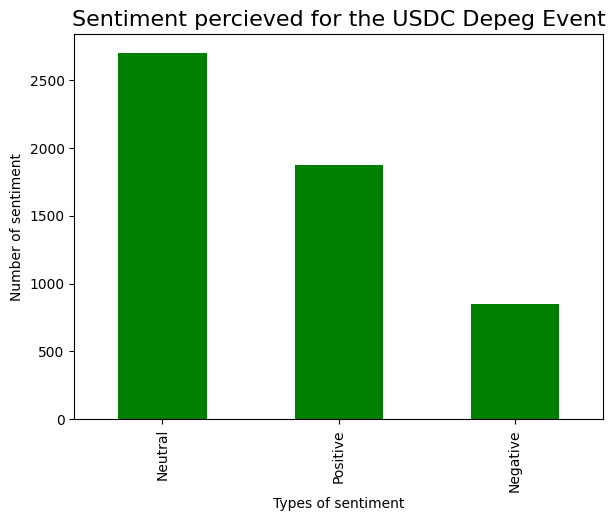

In [48]:
# plotting bar chart for the Sentiment
plt.subplot(1,2,1)
sent.plot(kind='bar', color=['green'], figsize=(15,5))
plt.title('Sentiment percieved for the USDC Depeg Event', fontsize=16)
plt.xlabel('Types of sentiment')
plt.ylabel('Number of sentiment');

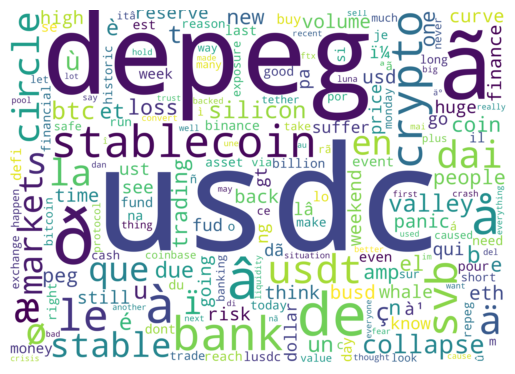

In [29]:
# Displaying the most talked about word in a word cloud 
# some stop words were still evident but was removed during visualization on Power BI
# Instantiate the Twitter word cloud object
w_cloud = WordCloud(collocations = False,max_words=200, background_color = 'white', width = 7000, height = 5000).generate(tweets_string)

# Display the generated Word Cloud
plt.imshow(w_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [68]:
#def sentiment_analysis(df):
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity
  
 #Create a function to get the polarity
def getPolarity(text):
   return TextBlob(text).sentiment.polarity
  
 #Create two new columns ‘Subjectivity’ & ‘Polarity’
df['Subjectivity'] =    df['Processed_Tweets'].apply(getSubjectivity)
df ['Polarity'] = df['Processed_Tweets'].apply(getPolarity)

df.head(5)

,Unnamed: 0,username,url,date,content,likeCount,lang,place,retweetedTweet,viewCount,Processed_Tweets,uniswap,dex,balancer,binance,pancakeswap,curve,Polarity,Sentiment,Subjectivity
0,0,delucinator,https://twitter.com/delucinator/status/1635792...,2023-03-14 23:57:59+00:00,But the main reason I felt proud of this is be...,23,en,Unknown,NaN,7988.0,main reason felt proud specific play usdc depe...,Empty,Empty,Empty,Empty,Empty,Empty,0.230952,Positive,0.594048
1,1,crypto_chief_,https://twitter.com/crypto_chief_/status/16357...,2023-03-14 23:43:21+00:00,"Hey CT ðð¾ , how's it going amidst the US...",65,en,Unknown,NaN,7714.0,hey ct ðð hows going amidst usdc storm la...,Empty,Empty,Empty,Empty,Empty,Empty,-0.025000,Negative,0.233333
2,2,cowperwoodeth,https://twitter.com/cowperwoodeth/status/16357...,2023-03-14 23:36:07+00:00,@DeFi_Made_Here We also learned that DeFi ecos...,1,en,Unknown,NaN,263.0,madehere also learned defi ecosystem survived ...,Empty,Empty,Empty,Empty,Empty,Empty,0.062500,Positive,0.500000
3,3,BrikBC,https://twitter.com/BrikBC/status/163578604236...,2023-03-14 23:32:38+00:00,WHAT is #RealEstate #Tokenizationâ#WHATisTOK...,6,en,"{'_type': 'snscrape.modules.twitter.Place', 'i...",NaN,820.0, host ðï¸luis miguel aleixo brik open mi...,Empty,Empty,Empty,Empty,Empty,Empty,0.009091,Positive,0.750000
4,4,jonkodoteth,https://twitter.com/jonkodoteth/status/1635785...,2023-03-14 23:30:49+00:00,@maxbphi I sold most of my usdc for usdt the d...,1,en,Unknown,NaN,60.0,sold usdc usdt day depeg sold chain loss cuz r...,Empty,Empty,Empty,Empty,Empty,Empty,0.050000,Positive,0.100000


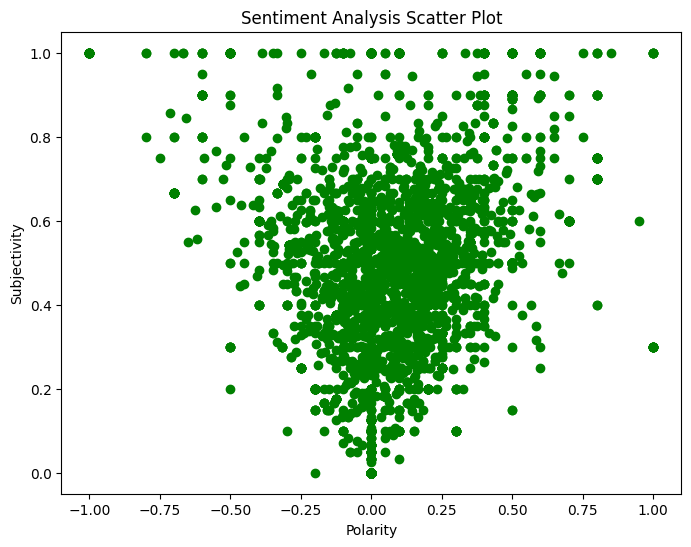

In [79]:
from textblob.en import subjectivity
#create a scatterplot to show subjectivity and polarity
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
  plt.scatter(df['Polarity'][i],df['Subjectivity'][i], color = 'green')
plt.title('Sentiment Analysis Scatter Plot')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

Text(0, 0.5, 'Number of sentiment')

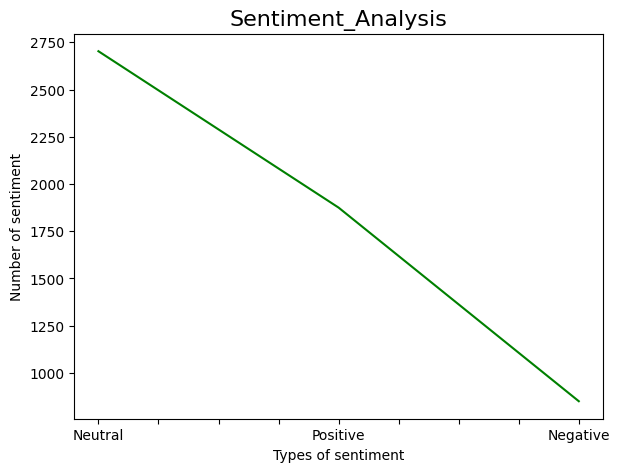

In [78]:
plt.subplot(1,2,1)
sent.plot(kind='line', color=['green'], figsize=(15,5))
plt.title('Sentiment_Analysis', fontsize=16)
plt.xlabel('Types of sentiment')
plt.ylabel('Number of sentiment')


In [80]:
#saving the file used for further used in power bi
df.to_csv('final_tweet.csv')